## Hands-on - Probability Distributions and Variability

In [9]:
# Import necessary libraries
import pandas as pd
import numpy as np
import seaborn as sns
import scipy.stats as stats
import matplotlib.pyplot as plt
from scipy.stats import binom, norm, ttest_1samp, mannwhitneyu, chi2_contingency

# Load dataset from GitHub URL
file_path = "https://raw.githubusercontent.com/Hamed-Ahmadinia/DASP-2025/main/epa-sea-level.csv"  # URL link to the dataset stored on GitHub

# Read the dataset into a pandas dataframe
df = pd.read_csv(file_path)  # Load the dataset as a pandas DataFrame

# Display the first few rows of the dataframe to confirm the data has been loaded correctly
print("Dataset Preview:")  # Print a label for context
print(df.head(5))  # Display the first 5 rows of the dataset

Dataset Preview:
   Year  CSIRO Adjusted Sea Level  Lower Error Bound  Upper Error Bound  \
0  1880                  0.000000          -0.952756           0.952756   
1  1881                  0.220472          -0.732283           1.173228   
2  1882                 -0.440945          -1.346457           0.464567   
3  1883                 -0.232283          -1.129921           0.665354   
4  1884                  0.590551          -0.283465           1.464567   

   NOAA Adjusted Sea Level  
0                      NaN  
1                      NaN  
2                      NaN  
3                      NaN  
4                      NaN  


## **Exercise 1: Understanding the Dataset**
🔹 **Question:** Display key statistics about the dataset using `.describe()`. `.

In [10]:
# Your code here:
df.describe()

,Year,CSIRO Adjusted Sea Level,Lower Error Bound,Upper Error Bound,NOAA Adjusted Sea Level
count,134.000000,134.000000,134.000000,134.000000,21.000000
mean,1946.500000,3.650341,3.204666,4.096016,7.363746
std,38.826537,2.485692,2.663781,2.312581,0.691038
min,1880.000000,-0.440945,-1.346457,0.464567,6.297493
25%,1913.250000,1.632874,1.078740,2.240157,6.848690
50%,1946.500000,3.312992,2.915354,3.710630,7.488353
75%,1979.750000,5.587598,5.329724,5.845472,7.907365
max,2013.000000,9.326772,8.992126,9.661417,8.546648


## **Exercise 2: Identifying Outliers**
🔹 **Question:** Use the **interquartile range (IQR)** method to detect outliers in the **CSIRO Adjusted Sea Level** column. .)re)  


25th percentile of sea level: 1.632874014
75th percentile of sea level: 5.5875984195
IQR level: 3.9547244055


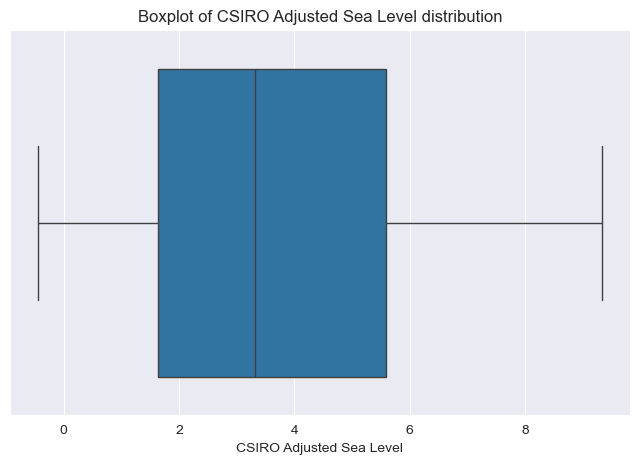

In [11]:
# Your code here:
# Calculate Q1 (25th percentile), Q3 (75th percentile), and IQR for sea level
q1_level = df["CSIRO Adjusted Sea Level"].quantile(0.25)
q3_level = df["CSIRO Adjusted Sea Level"].quantile(0.75)
iqr_level = q3_level - q1_level
print(f"25th percentile of sea level: {q1_level}")
print(f"75th percentile of sea level: {q3_level}")
print(f"IQR level: {iqr_level}")

# Visualize IQR using a boxplot
plt.figure(figsize = (8, 5))
sns.boxplot(x = df["CSIRO Adjusted Sea Level"])
plt.title("Boxplot of CSIRO Adjusted Sea Level distribution")
plt.show()


## **Exercise 3: Exploring Distributions**
🔹 **Question:** Create a **boxplot** of sea level rise grouped by decade (e.g., 1880-1890, 1891-1900, etc.). e?

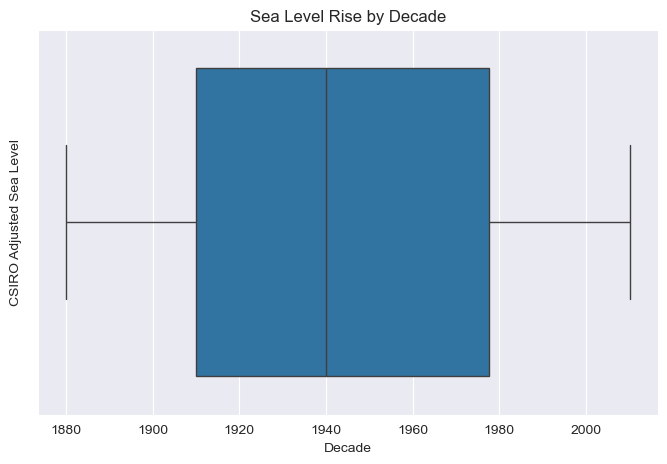

In [19]:
# Your code here:
df['Decade'] = (df['Year'] // 10) * 10
sea_level_by_decade = df.groupby('Year')['CSIRO Adjusted Sea Level'].mean()

plt.figure(figsize=(8, 5))
sns.boxplot(x=df["Decade"])
plt.title("Sea Level Rise by Decade")
plt.xlabel('Decade')
plt.ylabel('CSIRO Adjusted Sea Level')
plt.show()

## **Exercise 4: Hypothesis Testing on Trends**
🔹 **Question:** Perform a **T-test** to check if the mean sea level in the 21st century (2000-2014) is significantly higher than in the 20th century (1900-1999).  



T-test (21st vs 20st Century Sea Level): t-stat = 9.159411123588008, p-value = 2.8739747491456557e-15


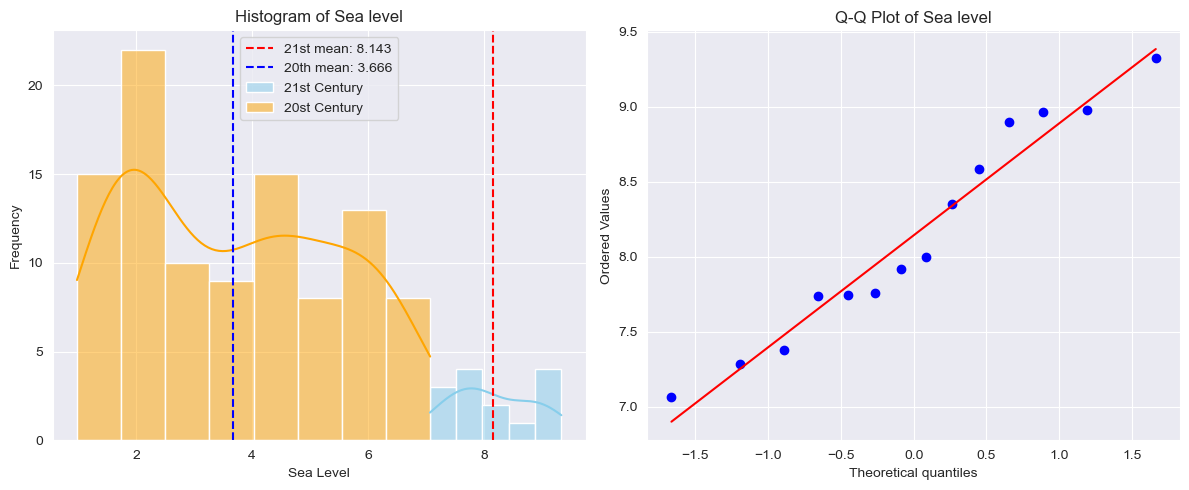

In [31]:
from scipy.stats import ttest_ind

# Your code here:
# check if the mean sea level in the 21st century (2000-2014) is significantly higher than in the 20th century (1900-1999)

# Extract the first 29 days of Monero prices
xs21 = df[(df['Year'] >= 2000) & (df['Year'] <= 2014)]['CSIRO Adjusted Sea Level']
xs20 = df[(df['Year'] >= 1900) & (df['Year'] <= 1999)]['CSIRO Adjusted Sea Level']


# Perform a t-test: is the mean sea level in the 21st century (2000-2014) is significantly higher than in the 20th century (1900-1999)?
t_stat, p_val = ttest_ind(xs21, xs20)

# Display test statistic and p-value
print(f"\nT-test (21st vs 20st Century Sea Level): t-stat = {t_stat}, p-value = {p_val}")

plt.figure(figsize=(12, 5))

# Histogram + KDE for the 21st century
plt.subplot(1, 2, 1)
sns.histplot(xs21, kde=True, color='skyblue', label='21st Century')
sns.histplot(xs20, kde=True, color='orange', label='20st Century')
plt.axvline(xs21.mean(), color='red', linestyle='--', label=f"21st mean: {xs21.mean():.3f}")
plt.axvline(xs20.mean(), color='blue', linestyle='--', label=f"20th mean: {xs20.mean():.3f}" )
plt.title("Histogram of Sea level")
plt.xlabel("Sea Level")
plt.ylabel("Frequency")
plt.legend()

# Q-Q plot to check for normality of the sample (assumption for t-test)
plt.subplot(1, 2, 2)
import scipy.stats as stats
stats.probplot(xs21, dist="norm", plot=plt)
plt.title("Q-Q Plot of Sea level")

# Adjust layout for a clean display
plt.tight_layout()
plt.show()

## **Exercise 5: Probability Distributions**
🔹 **Question:** Fit a **Poisson distribution** to the sea level rise data. ? 


In [14]:
# Your code here:

## **Exercise 6: Correlation Analysis**
🔹 **Question:** Check if there is a correlation between **CSIRO Adjusted Sea Level** and **NOAA Adjusted Sea Level**.  

In [15]:
# Your code here:

## **Exercise 7: Summary Reflection**
🔹 **Question:** Summarize your findings from this analysis.  

In [16]:
# Your code here: